In [588]:
import csv
import pandas as pd
import matplotlib.pyplot as plt 
import sqlite3
import seaborn as sns
import numpy as np
from matplotlib import font_manager

In [589]:
#import bom movie csv file as moviegross
moviegross=pd.read_csv("/Users/Shen/Documents/Flatiron/Project_1/dsc-phase-1-project-template/zippedData/bom.movie_gross.csv")

In [590]:
#import tn movie csv file
moviebudget=pd.read_csv("/Users/Shen/Documents/Flatiron/Project_1/dsc-phase-1-project-template/zippedData/tn.movie_budgets.csv")

In [591]:
#import rt movie info csv file
movieinfo=pd.read_table("/Users/Shen/Documents/Flatiron/Project_1/dsc-phase-1-project-template/zippedData/rt.movie_info.tsv")

In [592]:
#import tmdb movie csv file
tmdbmovie=pd.read_table("/Users/Shen/Documents/Flatiron/Project_1/dsc-phase-1-project-template/zippedData/tmdb.movies.csv",delimiter=",")

In [593]:
#clean up tmdbmovie genres id column by separating the ids by ","
#this is for the purpose of exploding the genre ids to multiple rows for the calculation of genre popularity later on
tmdbmovie['genre_ids'] = tmdbmovie['genre_ids'].apply(lambda x: x.replace('[','').replace(']','').split(','))

In [594]:
#expanding the tmdbmovie genre into multiple roles
#convert each genre id into str for stripping the empty spaces for later mapping genre id to a genre name dictionary list
newtmdbmovie=tmdbmovie.explode('genre_ids')
newtmdbmovie['genre_ids'] = newtmdbmovie['genre_ids'].astype(str)

In [595]:
#stripping the empty spaces in genre id
newtmdbmovie['genre_ids']=newtmdbmovie['genre_ids'].str.strip()
newtmdbmovie['genre_ids']

0           12
0           14
0        10751
1           14
1           12
         ...  
26515    10751
26515       12
26515       28
26516       53
26516       27
Name: genre_ids, Length: 47834, dtype: object

In [596]:
#glossory of movie genre id. Information was found here: https://www.themoviedb.org/talk/5daf6eb0ae36680011d7e6ee
movie_genres = {"28":"Action",
"12":"Adventure",
"16":"Animation",
"35":"Comedy",
"80":"Crime",
"99":"Documentary",
"18":"Drama",
"10751":"Family",
"14":"Fantasy",
"36":"History",
"27":"Horror",
"10402":"Music",
"9648":"Mystery",
"10749":"Romance",
"878":"Science Fiction",
"10770":"TV Movie",
"53":"Thriller",
"10752":"War"}

In [597]:
#maping genre ids to genre names
newtmdbmovie['genre_names']=newtmdbmovie['genre_ids'].apply(lambda x: movie_genres.get(x))
newtmdbmovie

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,genre_names
0,0,12,12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,Adventure
0,0,14,12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,Fantasy
0,0,10751,12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,Family
1,1,14,10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,Fantasy
1,1,12,10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,Adventure
...,...,...,...,...,...,...,...,...,...,...,...
26515,26515,10751,366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1,Family
26515,26515,12,366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1,Adventure
26515,26515,28,366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1,Action
26516,26516,53,309885,en,The Church,0.600,2018-10-05,The Church,0.0,1,Thriller


In [598]:
#create a new column to show the year of the release date of each movie
release_year = pd.DatetimeIndex(newtmdbmovie['release_date']).year
newtmdbmovie['release_year']=release_year
newtmdbmovie

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,genre_names,release_year
0,0,12,12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,Adventure,2010
0,0,14,12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,Fantasy,2010
0,0,10751,12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,Family,2010
1,1,14,10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,Fantasy,2010
1,1,12,10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,Adventure,2010
...,...,...,...,...,...,...,...,...,...,...,...,...
26515,26515,10751,366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1,Family,2018
26515,26515,12,366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1,Adventure,2018
26515,26515,28,366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1,Action,2018
26516,26516,53,309885,en,The Church,0.600,2018-10-05,The Church,0.0,1,Thriller,2018


In [806]:
#groupby the genre names + popularity + votecount to demonstry 
table1=newtmdbmovie.groupby('genre_names')['popularity','vote_count'].mean()
table2=table1.sort_values(by=['popularity'],ascending=False)
table2

<ipython-input-806-7fb5a7e0d77c>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  table1=newtmdbmovie.groupby('genre_names')['popularity','vote_count'].mean()


,popularity,vote_count
genre_names,,
Adventure,7.557082,1175.591429
Action,6.495047,732.117152
Fantasy,6.387318,792.639157
Crime,5.416396,417.617822
War,5.320197,428.290909
Science Fiction,5.238197,693.895573
Thriller,4.840918,319.200618
Mystery,4.821546,357.858529
Family,4.735889,416.987220


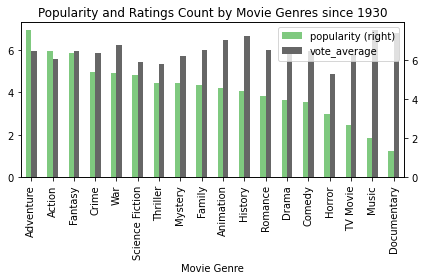

In [799]:
#populate bar graph to show the trend
table2.plot(secondary_y='popularity', colormap = 'Accent', title="Popularity and Ratings Count by Movie Genres since 1930", xlabel="Movie Genre",kind='bar')
plt.tight_layout()
plt.savefig("Popularity+votecount vs Movie Genre.pdf")

In [709]:
#dataframe for past 10 years of data
newtmdbmovie2012=newtmdbmovie.drop(newtmdbmovie[(newtmdbmovie['release_year'] < 2012) | (newtmdbmovie['release_year'] > 2017)].index,inplace=False)
newtmdbmovie2012['release_year'].max()

2017

In [758]:
#groupby another chart to display past 10 years of information
newtmdbmovie2012gb=newtmdbmovie2012.groupby('genre_names')['popularity'].mean().sort_values(ascending=False)

<AxesSubplot:label='de4a5a42-e14f-438d-b422-02c8d30e11fd'>

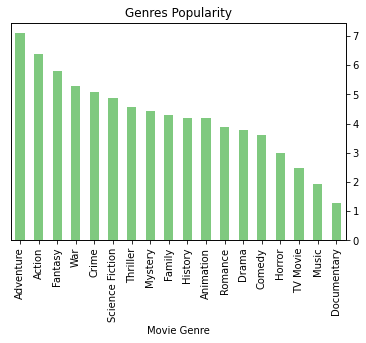

In [808]:
#populate the bar graph to display the trend in the past 10 years
newtmdbmovie2012gb.plot(secondary_y='popularity', colormap = 'Accent',title="Genres Popularity", xlabel="Movie Genre",kind='bar')
#plt.tight_layout()
#plt.savefig("Popularity+votecount vs Movie Genre past 10 years.pdf")

In [657]:
#Understanding the timeframe of the dataset - information might be used in the presentation
datayears=newtmdbmovie['release_year'].unique()
np.sort(datayears).min()

1930

In [713]:
#obtaining the top five popular genres for trend analytsis 
table5=newtmdbmovie2012gb.reset_index()
top5popgenres=table5['genre_names'].unique()
top5popgenres=top5popgenres[0:5]
top5popgenres

array(['Adventure', 'Action', 'Fantasy', 'War', 'Crime'], dtype=object)

Text(0.5, 1.0, 'Top 5 Genres Popularity Trend')

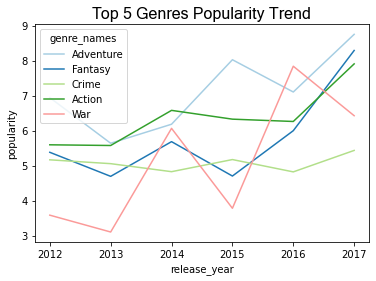

In [780]:
#linechart of popularity trend in past 10 years
#groupby another chart to display past 10 years information

table3tenyears=newtmdbmovie2012.groupby(['genre_names','release_year']).mean().sort_values(by = 'popularity',ascending = False).sort_values(by = 'release_year',ascending = False)
table3tenyears=table3tenyears.reset_index()

graphdf=table3tenyears.loc[table3tenyears['genre_names'].isin(top5popgenres)]

sns.lineplot(x = 'release_year', y='popularity', hue = 'genre_names', data = graphdf,palette='Paired').set_title('Top 5 Genres Popularity Trend',fontsize=16, fontname="Microsoft Sans Serif")

#plt.tight_layout()
#plt.savefig("Popularity & Votecount vs Movie Genre.pdf")

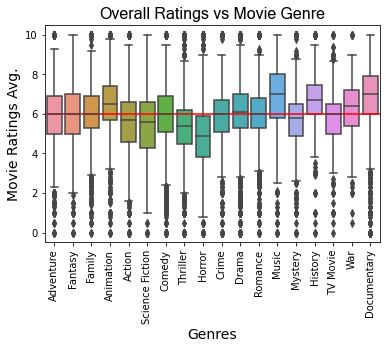

<Figure size 432x288 with 0 Axes>

In [715]:
#general ratings of the genres - in boxplot 
fig, axs = plt.subplots()
y2=newtmdbmovie['vote_average'].median()
sns.boxplot(x = 'genre_names', y='vote_average', data = newtmdbmovie, orient = 'v', ax = None)
plt.axhline(y2, c='r')
plt.xticks(rotation=90)
#sns.boxplot(x = 'genre_names', y = 'popularity', width=0.5, data = newtmdbmovie, orient = 'v', ax = ax[1])

axs.set_title('Overall Ratings vs Movie Genre',fontsize=16, fontname="Microsoft Sans Serif")
axs.set_xlabel('Genres', fontsize=14)
axs.set_ylabel('Movie Ratings Avg.', fontsize=14)

plt.show()

plt.tight_layout()
plt.savefig("Overall Ratings vs Movie Genre.pdf")

In [731]:
#create a new column to show the month of the release date of each movie in the recommended genres - Action and Adventure
release_month = pd.DatetimeIndex(newtmdbmovie['release_date']).month
newtmdbmovie['release_month']=release_month
newtmdbmovie

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,genre_names,release_year,release_month
0,0,12,12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,Adventure,2010,11
0,0,14,12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,Fantasy,2010,11
0,0,10751,12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,Family,2010,11
1,1,14,10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,Fantasy,2010,3
1,1,12,10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,Adventure,2010,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
26515,26515,10751,366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1,Family,2018,6
26515,26515,12,366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1,Adventure,2018,6
26515,26515,28,366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1,Action,2018,6
26516,26516,53,309885,en,The Church,0.600,2018-10-05,The Church,0.0,1,Thriller,2018,10


In [732]:
recommendgenres=['Adventure','Fantasy']
newtmdbmovierecommend=newtmdbmovie[newtmdbmovie['genre_names'].isin(recommendgenres)]
newtmdbmovierecommend=newtmdbmovierecommend.loc[:,['genre_names','release_month']]
newtmdbmovierecommend=newtmdbmovierecommend.groupby(['release_month','genre_names'])['genre_names'].count().reset_index(name="count")
newtmdbmovierecommend

,release_month,genre_names,count
0,1,Adventure,141
1,1,Fantasy,88
2,2,Adventure,109
3,2,Fantasy,76
4,3,Adventure,112
5,3,Fantasy,95
6,4,Adventure,106
7,4,Fantasy,80
8,5,Adventure,109
9,5,Fantasy,90


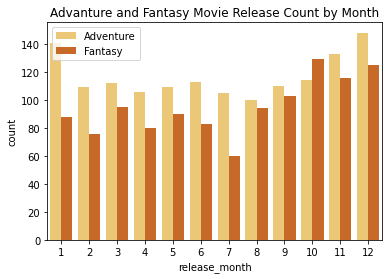

In [774]:
sns.barplot(data=newtmdbmovierecommend,x='release_month',y = 'count',palette='YlOrBr',hue='genre_names').set(title="Advanture and Fantasy Movie Release Count by Month")
plt.legend(loc='upper left')

In [474]:
rtreviews=pd.read_table("/Users/Shen/Documents/Flatiron/Project_1/dsc-phase-1-project-template/zippedData/rt.reviews.tsv", encoding="unicode_escape")

In [475]:
conn=sqlite3.connect("/Users/Shen/Documents/Flatiron/Project_1/dsc-phase-1-project-template/zippedData/im.db")
pd.read_sql("""SELECT * FROM sqlite_master;""",conn)

,type,name,tbl_name,rootpage,sql
0,table,movie_basics,movie_basics,2,"CREATE TABLE ""movie_basics"" (\n""movie_id"" TEXT..."
1,table,directors,directors,3,"CREATE TABLE ""directors"" (\n""movie_id"" TEXT,\n..."
2,table,known_for,known_for,4,"CREATE TABLE ""known_for"" (\n""person_id"" TEXT,\..."
3,table,movie_akas,movie_akas,5,"CREATE TABLE ""movie_akas"" (\n""movie_id"" TEXT,\..."
4,table,movie_ratings,movie_ratings,6,"CREATE TABLE ""movie_ratings"" (\n""movie_id"" TEX..."
5,table,persons,persons,7,"CREATE TABLE ""persons"" (\n""person_id"" TEXT,\n ..."
6,table,principals,principals,8,"CREATE TABLE ""principals"" (\n""movie_id"" TEXT,\..."
7,table,writers,writers,9,"CREATE TABLE ""writers"" (\n""movie_id"" TEXT,\n ..."


In [340]:
#glossory of pdmovie tables SQL
pdmoviebasics=pd.read_sql("""SELECT * FROM movie_basics""",conn)
pdmoviedirectors=pd.read_sql("""SELECT * FROM directors""",conn)
pdmovieknownfor=pd.read_sql("""SELECT * FROM known_for""",conn)
pdmovie_akas=pd.read_sql("""SELECT * FROM movie_akas""",conn)
pdmovie_ratings=pd.read_sql("""SELECT * FROM movie_ratings""",conn)
pdmovie_persons=pd.read_sql("""SELECT * FROM persons""",conn)
pdmovie_principals=pd.read_sql("""SELECT * FROM principals""",conn)
pdmovie_writers=pd.read_sql("""SELECT * FROM writers""",conn)

In [341]:
#reformat im.db datat to merge all tables into one:
#join directors data into movie basics by change person_id to name dir_id 
#left - bascis and right directors
#new column is called pdmoviebasicsdir
pdmoviebasicsdir=pdmoviebasics.merge(pdmoviedirectors,on='movie_id',how='left')
pdmoviebasicsdir=pdmoviebasicsdir.rename(columns={"person_id":"dir_id"})

In [342]:
#adding movieknown to pdmoviebasicsdir to show what movies the dirs are known for
pdmovieknownfor=pdmovieknownfor.rename(columns={"person_id":"dir_id","movie_id":"known_for_movie"})
pdmoviebasicsdir=pdmoviebasicsdir.merge(pdmovieknownfor,on="dir_id",how='left')

In [343]:
pdmovie_akas
pdmovieknownfor=pdmovieknownfor.rename(columns={"person_id":"dir_id","movie_id":"known_for_movie"})
pdmoviebasicsdir=pdmoviebasicsdir.merge(pdmovieknownfor,on="dir_id",how='left')

In [344]:
#final list for pdmovie basics!- pdmoviebasicsmaster
pdmoviebasicsmaster=pdmoviebasicsdir.merge(pdmovie_ratings,on="movie_id",how='left')
pdmoviebasicsmaster=pdmoviebasicsmaster.drop('known_for_movie_x',axis=1)
pdmoviebasicsmaster=pdmoviebasicsmaster.drop('known_for_movie_y',axis=1)
pdmoviebasicsmaster=pdmoviebasicsmaster.drop_duplicates()
pdmoviebasicsmaster['genres']

0            Action,Crime,Drama
64              Biography,Drama
80                        Drama
112                Comedy,Drama
128        Comedy,Drama,Fantasy
                   ...         
3716064             Documentary
3716112                  Comedy
3716113                    None
3716114             Documentary
3716130             Documentary
Name: genres, Length: 169262, dtype: object

In [345]:
pdmoviebasicsmaster.dropna(subset=['genres'],inplace=True)
pdmoviebasicsmaster['genres']

0            Action,Crime,Drama
64              Biography,Drama
80                        Drama
112                Comedy,Drama
128        Comedy,Drama,Fantasy
                   ...         
3716048             Documentary
3716064             Documentary
3716112                  Comedy
3716114             Documentary
3716130             Documentary
Name: genres, Length: 163287, dtype: object

In [270]:
pdmoviebasicsmaster['genres']=pdmoviebasicsmaster['genres'].apply(lambda x : x.split(','))

In [271]:
pdmoviebasicsmaster=pdmoviebasicsmaster.explode('genres')

In [272]:
pdmovie_principals=pdmovie_principals.merge(pdmovie_persons,on="person_id",how='left')

In [273]:
#final list for all writer and dir info - pdmoviewriterprincipal
pdmovie_writers=pdmovie_writers.rename(columns={"person_id":"writer_id"})
pdmoviewriterprincipal=pdmovie_principals.merge(pdmovie_writers,on="movie_id",how='left').rename(columns={"person_id":"dir_id"})

In [274]:
pdmoviebasicsmaster=pdmoviebasicsmaster.merge(pdmoviewriterprincipal, how='left' ,on='dir_id')


In [276]:
pdmoviedir=pdmoviebasicsmaster.groupby(['genres','dir_id','primary_name'])['averagerating','numvotes'].mean()
pdmoviedir

<ipython-input-276-b7b06a0462ab>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  pdmoviedir=pdmoviebasicsmaster.groupby(['genres','dir_id','primary_name'])['averagerating','numvotes'].mean()


averagerating       numvotes
genres  dir_id    primary_name                                    
Action  nm0000108 Luc Besson                   6.40  187159.666667
        nm0000110 Kenneth Branagh              6.60  399088.500000
        nm0000116 James Cameron                 NaN            NaN
        nm0000142 Clint Eastwood               7.30  401915.000000
        nm0000165 Ron Howard                   7.05  216821.500000
...                                             ...            ...
Western nm9484846 John Law                     5.80      29.000000
        nm9498506 Robert Lundahl                NaN            NaN
        nm9567079 Craig Hard                    NaN            NaN
        nm9574121 Aykan Yucel Irwins            NaN            NaN
        nm9724526 Paolo Treviso                 NaN            NaN

[211393 rows x 2 columns]

In [292]:
x=pdmoviedir.reset_index()
x

,genres,dir_id,primary_name,averagerating,numvotes
0,Action,nm0000108,Luc Besson,6.40,187159.666667
1,Action,nm0000110,Kenneth Branagh,6.60,399088.500000
2,Action,nm0000116,James Cameron,NaN,NaN
3,Action,nm0000142,Clint Eastwood,7.30,401915.000000
4,Action,nm0000165,Ron Howard,7.05,216821.500000
...,...,...,...,...,...
211388,Western,nm9484846,John Law,5.80,29.000000
211389,Western,nm9498506,Robert Lundahl,NaN,NaN
211390,Western,nm9567079,Craig Hard,NaN,NaN
211391,Western,nm9574121,Aykan Yucel Irwins,NaN,NaN


In [295]:
x[x['genres'] =='Fantasy']

,genres,dir_id,primary_name,averagerating,numvotes
0,Action,nm0000108,Luc Besson,6.40,187159.666667
1,Action,nm0000110,Kenneth Branagh,6.60,399088.500000
2,Action,nm0000116,James Cameron,NaN,NaN
3,Action,nm0000142,Clint Eastwood,7.30,401915.000000
4,Action,nm0000165,Ron Howard,7.05,216821.500000
...,...,...,...,...,...
8816,Action,nm9985754,Zack Reichgut,NaN,NaN
8817,Action,nm9987882,Jonah Sarno,NaN,NaN
8818,Action,nm9987883,Calan Scherer,NaN,NaN
8819,Action,nm9992852,Dahl Lee,8.40,9.000000


In [535]:
xFantasy=x.loc[x['genres']=='Fantasy']
xFantasy=xFantasy.dropna()
xFantasynumvotes=xFantasy.sort_values(by=['numvotes','averagerating'],ascending=False)
xFantasynumvotes.head(20)

,genres,dir_id,primary_name,averagerating,numvotes
151424,Fantasy,nm0009190,J.J. Abrams,8.000000,784780.000000
151397,Fantasy,nm0001392,Peter Jackson,7.700000,574604.333333
151978,Fantasy,nm0851930,Alan Taylor,6.900000,540996.000000
151774,Fantasy,nm0532235,Seth MacFarlane,6.900000,538367.000000
151387,Fantasy,nm0000487,Ang Lee,7.900000,535836.000000
151557,Fantasy,nm0220600,Scott Derrickson,7.500000,514510.000000
151679,Fantasy,nm0420941,Patty Jenkins,7.500000,487527.000000
151681,Fantasy,nm0426059,Rian Johnson,7.100000,462903.000000
151375,Fantasy,nm0000110,Kenneth Branagh,6.950000,413028.000000
152028,Fantasy,nm0946734,David Yates,7.425000,411467.250000


In [320]:
xAdventure=x.loc[x['genres']=='Adventure']
xAdventure=xAdventure.dropna()
xAdvnumvotes=xAdventure.sort_values(by=['numvotes','averagerating'],ascending=False)
xAdvnumvotes.head(20)

,genres,dir_id,primary_name,averagerating,numvotes
9660,Adventure,nm0634240,Christopher Nolan,8.700,1.570200e+06
10010,Adventure,nm0923736,Joss Whedon,7.700,9.246245e+05
10914,Adventure,nm1783265,Tim Miller,8.000,8.208470e+05
8882,Adventure,nm0002657,Gary Ross,7.200,7.952270e+05
9322,Adventure,nm0348181,James Gunn,7.900,7.156555e+05
8831,Adventure,nm0000110,Kenneth Branagh,7.000,6.832640e+05
9301,Adventure,nm0327944,Alejandro G. Iñárritu,8.000,6.211930e+05
8923,Adventure,nm0009190,J.J. Abrams,7.850,6.151575e+05
9784,Adventure,nm0751577,Anthony Russo,8.225,5.904550e+05
9785,Adventure,nm0751648,Joe Russo,8.225,5.904550e+05


In [321]:
xAnimation=x.loc[x['genres']=='Animation']
xAnimation
xAnimation=xAnimation.dropna()
xAninumvotes=xAnimation.sort_values(by=['numvotes','averagerating'],ascending=False)
xAninumvotes.head(20)

,genres,dir_id,primary_name,averagerating,numvotes
15668,Animation,nm0215455,Ronnie Del Carmen,8.200000,536181.000000
15614,Animation,nm0118333,Chris Buck,7.500000,516998.000000
16482,Animation,nm1601644,Jennifer Lee,7.500000,516998.000000
16064,Animation,nm0881279,Lee Unkrich,8.350000,479706.000000
15990,Animation,nm0761498,Chris Sanders,7.650000,393999.000000
16310,Animation,nm1158544,Jared Bush,8.000000,383446.000000
15770,Animation,nm0397174,Byron Howard,7.900000,374906.000000
16612,Animation,nm1977355,Nathan Greno,7.800000,366366.000000
15963,Animation,nm0700760,Steve Purcell,7.100000,338728.000000
15563,Animation,nm0028764,Mark Andrews,7.100000,338728.000000
